In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
data = pd.read_csv(r"C:\Users\ABIRAINA\OneDrive\Desktop\guvi_project\miniproject3\Employee-Attrition - Employee-Attrition.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#  Separate features and target
X = data[['EnvironmentSatisfaction', 'PercentSalaryHike' ,'RelationshipSatisfaction','YearsInCurrentRole','Department','JobRole' ]]
y = data["PerformanceRating"]

In [5]:
# Detect categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(exclude=["object", "category"]).columns


In [6]:
 #One-Hot Encode categorical columns (dense output)
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = ohe.fit_transform(X[categorical_cols])

In [7]:
#Scale numerical columns
scaler = StandardScaler()
X_num = scaler.fit_transform(X[numerical_cols])


In [8]:
#Combine processed features
X_processed = np.hstack([X_num, X_cat])


In [9]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
# Train KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
k = 6
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))



Classification Report:
               precision    recall  f1-score   support

           3       0.94      0.99      0.97       249
           4       0.94      0.67      0.78        45

    accuracy                           0.94       294
   macro avg       0.94      0.83      0.87       294
weighted avg       0.94      0.94      0.94       294

Confusion Matrix:
 [[247   2]
 [ 15  30]]
ROC AUC Score: 0.9894243641231594


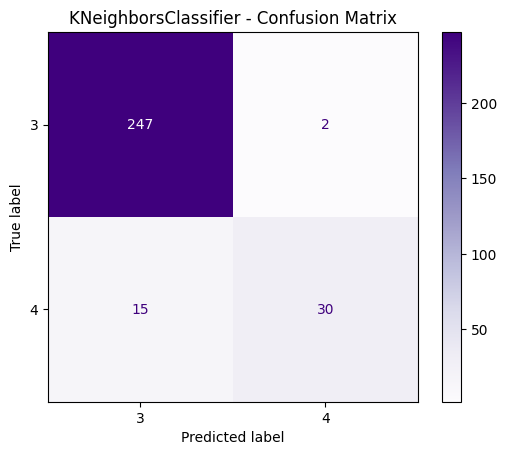

In [13]:
# Plot Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Purples")
plt.title("KNeighborsClassifier - Confusion Matrix")
plt.show()

c:\Users\ABIRAINA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


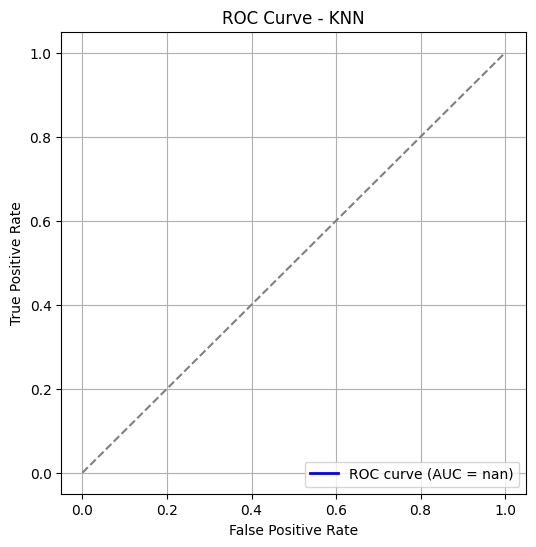

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities (for ROC we need probabilities, not labels)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label="Yes")
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [20]:
import pickle
# Save the trained model
with open("knn_mod.pkl", "wb") as f:
    pickle.dump(model, f)
print("Model saved as 'knn_mod.pkl'")


Model saved as 'knn_mod.pkl'


In [21]:
# Save scaler
with open("knn_scal.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("knn_scal saved successfully.")

knn_scal saved successfully.


In [23]:
# Save OneHotEncoder to file
with open("onehot_encoder.pkl", "wb") as f:
    pickle.dump(ohe, f)

print("onehot_encoder saved successfully.")

onehot_encoder saved successfully.
